<a href="https://colab.research.google.com/github/Alejandrooct/AI-course/blob/main/AI_course_Day8(Lenna).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AI course

Wednesday December 20, 2023.

## Assignement Day8A - Fourier transform in images (Lenna)

name: Alejandro Thamm

In [ ]:
# We will use the famous "Lena picture"

# 1 - read the input image and transform it to gray-scale.
#     show input image and grayscale image.

# 2 - Make a 2D Fourier transform (of the gray-scale image),
#     and show it in magnitude and phase.

# 3 - Make a high pass filter, and show the original and filtered images.

# 4 - Make a difference image
#     difference between grayscale image and filtered image.

# 5 - Make a 2D Fourier transform (of the difference image),
#     and show it in magnitude and phase.
#     Compare with the original image 2D Fourier Transform
#     Can you make any conclussion of the last image?


In [ ]:
# Step 0 - Some background on the famous Lenna image.

# This image has been used since the 70s by almost all image processing
# practitioners, students, researchers, and professionals.
# Lenna is a centerfold model for the Playboy magazine, and the complete image
# of Lenna was published in the November 1972 issue of the magazine.
# The famous image is just a crop of her face, the complete photo showed her in full body.
# Lena Forsén a swedish model was born in 1951 (yes, she is over 70 now).
# The image was originaly scanned as a TIFF file in 1973
# with a modified Muirhead wirephoto scanner,
# the scanner had a resolution of 100 lines per inch,
# and since they wanted a 512 x 512 image the scanned just 1 inch of it,
# cropping it at the shoulder level.
# We will use a jpg wersion.


In [ ]:
# Step 1 - load image and transform it into grayscale

# Chat GPT prompt

# I am using a colab notebook, and python,
# I am working with images,
# I have the lena picture in: /content/Lenna.png
# Read this mage,
# Transform it to gray-scale,
# Show both images side by side.

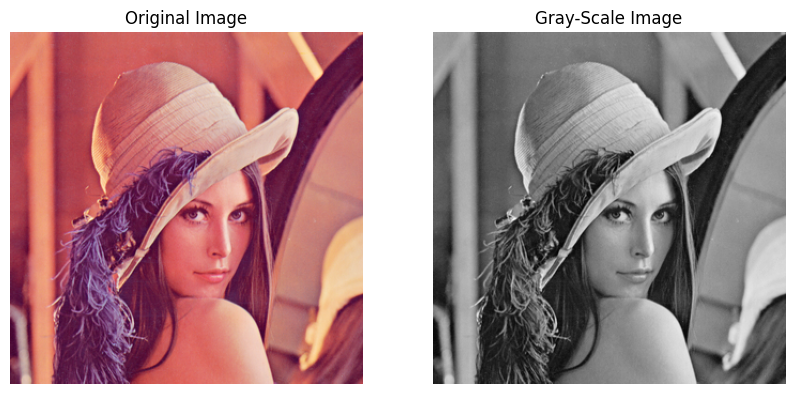

In [ ]:
# Step 1 - load image and transform it into grayscale

import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/Lenna.png'
lena_image = cv2.imread(image_path)

# Convert the image to gray-scale
gray_lena = cv2.cvtColor(lena_image, cv2.COLOR_BGR2GRAY)

# Display the original and gray-scale images side by side
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(lena_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Gray-scale image
plt.subplot(1, 2, 2)
plt.imshow(gray_lena, cmap='gray')
plt.title('Gray-Scale Image')
plt.axis('off')

plt.show()


In [ ]:
# Step 2 - 2D Fourier transform in magnitude and phase.

# Chat GPT prompt

# Now make a 2D Fourier transform of the grayscale image,
# and show the grayscale image together with the magnitude and phase of the Fourier transforms.
# As is usual, in these cases, shift the origin of coordinates to the center of the image for a better visualization.


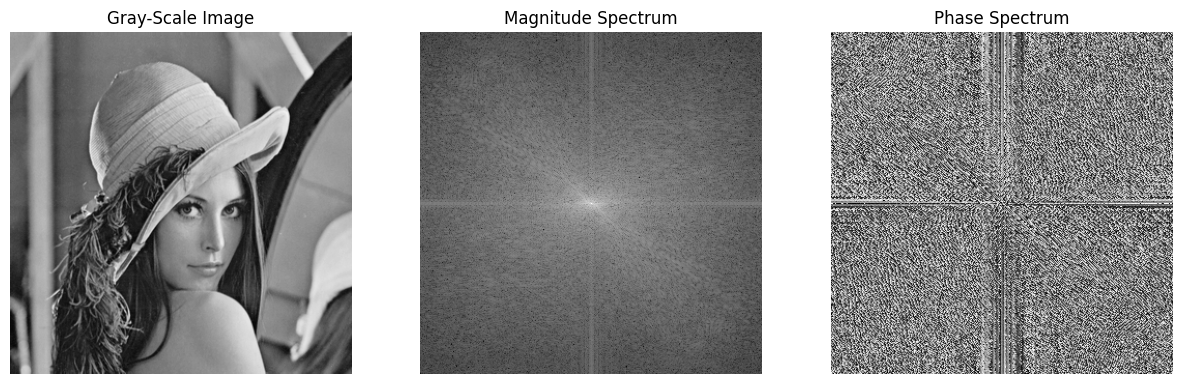

In [ ]:
# Step 2 - 2D Fourier transform in magnitude and phase.

import numpy as np

# Perform 2D Fourier transform on the gray-scale image
fourier_transform = np.fft.fft2(gray_lena)
# Shift the zero frequency component to the center
fourier_transform_shifted = np.fft.fftshift(fourier_transform)

# Calculate the magnitude and phase
magnitude_spectrum = np.abs(fourier_transform_shifted)
phase_spectrum = np.angle(fourier_transform_shifted)

# Display the original image, magnitude, and phase side by side
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(gray_lena, cmap='gray')
plt.title('Gray-Scale Image')
plt.axis('off')

# Magnitude spectrum
plt.subplot(1, 3, 2)
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

# Phase spectrum
plt.subplot(1, 3, 3)
plt.imshow(phase_spectrum, cmap='gray')
plt.title('Phase Spectrum')
plt.axis('off')

plt.show()


In [ ]:
# Step 3 - Make a high pass filter, and show the original and filtered images.

# A high pass filter will block the low frequencies.
# This will result in enhancing the borders of the image.
# So the borders will be enhanced in white.
# while the regular color regions (plain regions), will look darker.

# Chat GPT prompt

# Now, make a high pass filter (do not use gaussian)
# apply it to the gray-scale image.
# Show:
#  - the grayscale image
#  - the filter applied,
#  - the filtered image,
# -  a magnitude 2D Fourier transform of the filtered image


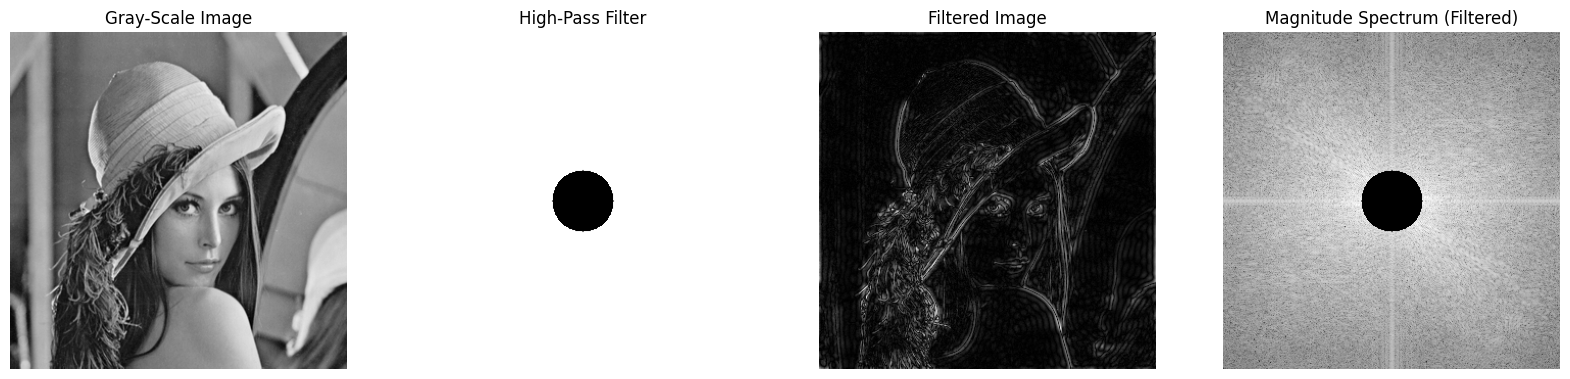

In [ ]:
# Step 3 - Make a high pass filter, and show the original and filtered images.

import numpy as np

# Function to create a high-pass filter
def high_pass_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2 , cols // 2

    # Create a mask with high values in the center and low values in the outer region
    mask = np.ones((rows, cols), np.float32)
    radius = cutoff
    center = [crow, ccol]
    x, y = np.ogrid[:rows, :cols]
    mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= radius ** 2
    mask[mask_area] = 0

    return mask

# Define cutoff frequency for the high-pass filter
cutoff_frequency = 30

# Create the high-pass filter
high_pass_mask = high_pass_filter(gray_lena.shape, cutoff_frequency)

# Apply the high-pass filter to the Fourier-transformed image
filtered_fourier = fourier_transform_shifted * high_pass_mask

# Inverse Fourier transform to get the filtered image
filtered_image = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_fourier)))

# Display the original image, high-pass filter, filtered image, and magnitude spectrum of the filtered image
plt.figure(figsize=(20, 5))

# Original image
plt.subplot(1, 4, 1)
plt.imshow(gray_lena, cmap='gray')
plt.title('Gray-Scale Image')
plt.axis('off')

# High-pass filter
plt.subplot(1, 4, 2)
plt.imshow(high_pass_mask, cmap='gray')
plt.title('High-Pass Filter')
plt.axis('off')

# Filtered image
plt.subplot(1, 4, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

# Magnitude spectrum of the filtered image
plt.subplot(1, 4, 4)
plt.imshow(np.log(1 + np.abs(filtered_fourier)), cmap='gray')
plt.title('Magnitude Spectrum (Filtered)')
plt.axis('off')

plt.show()


In [ ]:
# Step 3B - (extra step added)

#   A negative of the filtered image will look more or less like a pencil
#   drawing that shows only the lines.
#   So actually, when we make this kind of drawing, we are enhancing the borders of an image

#   but when looking at the hair, notice thast whan a person makes a drawing,
#   he will draw the hais from begining to end, and here, in the parts that hairs
#   make no contrast with the background, the hair simply "dissapears".
#   So, a high pass filter, will show only the "contrasting hairs".

# Chat GPT prompt

# Now make a negative image of the filtered image,
# and show the gray scale image and the negative of the filtered image.


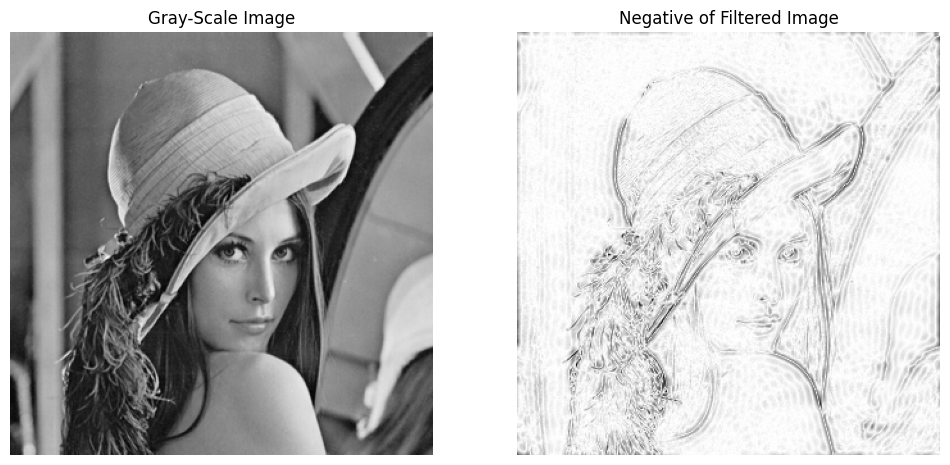

In [ ]:
# Step 3B - (extra step added)

# Create a negative image of the filtered image
negative_filtered_image = 255 - filtered_image

# Display the grayscale image and the negative of the filtered image
plt.figure(figsize=(12, 6))

# Grayscale image
plt.subplot(1, 2, 1)
plt.imshow(gray_lena, cmap='gray')
plt.title('Gray-Scale Image')
plt.axis('off')

# Negative of the filtered image
plt.subplot(1, 2, 2)
plt.imshow(negative_filtered_image, cmap='gray')
plt.title('Negative of Filtered Image')
plt.axis('off')

plt.show()


In [ ]:

# A negative of the high pass filtered image looks more or less lika a pencil drawing.


In [ ]:
# Step 4 - Make a difference image

# ChatGPT prompt

# Now, make a difference image,
# Make an image in which each pixel will be the value of the gray scale image, minus the filtered image.
# Show:
#  - the gray scale image
#  - the filtered image
#  - the difference image


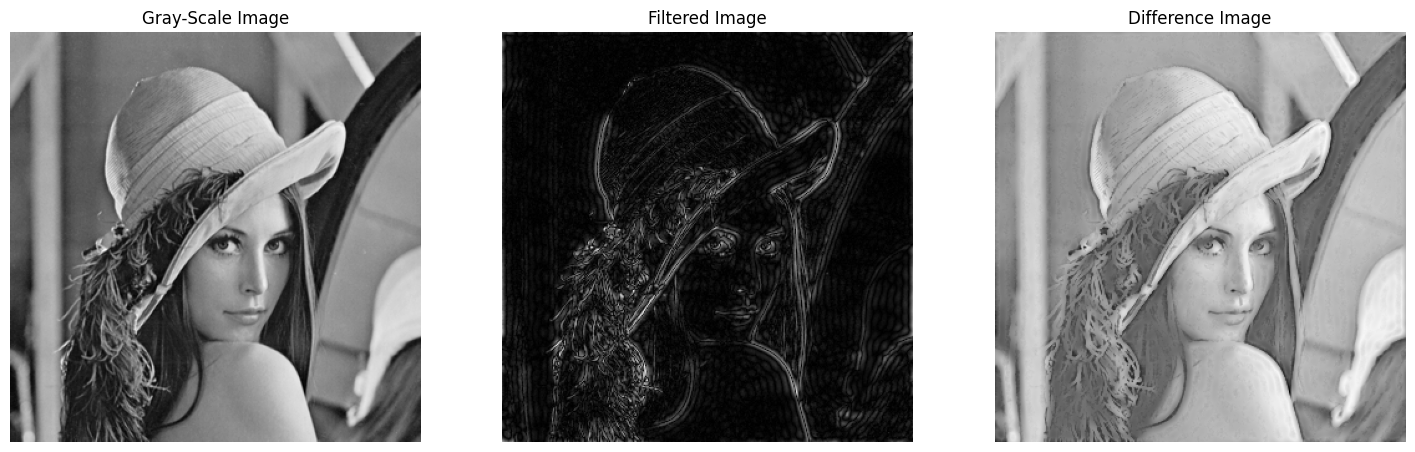

In [ ]:
# Step 4 - Make a difference image

# Create the difference image
difference_image = gray_lena - filtered_image

# Display the grayscale image, filtered image, and the difference image
plt.figure(figsize=(18, 6))

# Grayscale image
plt.subplot(1, 3, 1)
plt.imshow(gray_lena, cmap='gray')
plt.title('Gray-Scale Image')
plt.axis('off')

# Filtered image
plt.subplot(1, 3, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

# Difference image
plt.subplot(1, 3, 3)
plt.imshow(difference_image, cmap='gray')
plt.title('Difference Image')
plt.axis('off')

plt.show()


In [ ]:

# The difference image looks blurry when compared to the original image.
# and it makes sense, because we have reduced the intensity (0-255 gray values)
# of the "white-pencil-lines" in the image (the ones shown in the filter)


In [ ]:
# Step 5 - Make a 2D Fourier transform (of the difference image),
#          and show it in magnitude and phase.

# Chat GPT prompt

# Make a 2D Fourier transform (of the difference image),
# and show it in magnitude and phase.


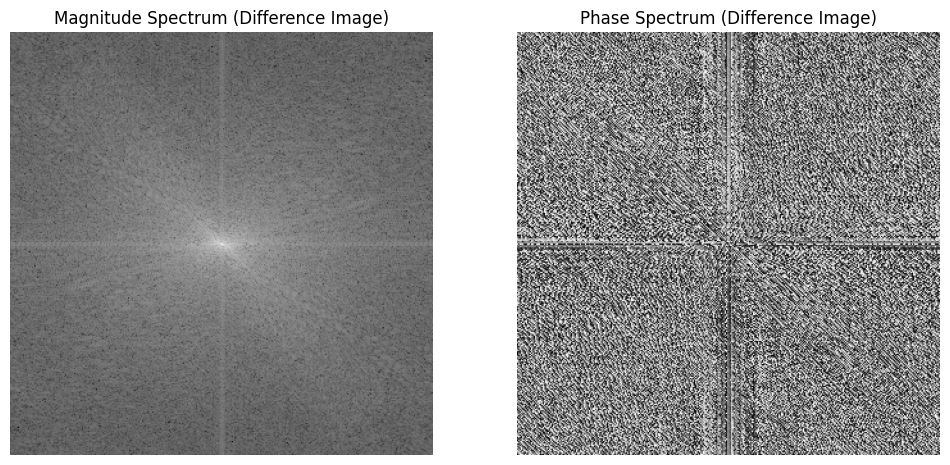

In [ ]:
# Step 5 - Make a 2D Fourier transform (of the difference image),

# Perform 2D Fourier transform on the difference image
difference_fourier_transform = np.fft.fft2(difference_image)
# Shift the zero frequency component to the center
difference_fourier_transform_shifted = np.fft.fftshift(difference_fourier_transform)

# Calculate the magnitude and phase of the Fourier transform
difference_magnitude_spectrum = np.abs(difference_fourier_transform_shifted)
difference_phase_spectrum = np.angle(difference_fourier_transform_shifted)

# Display the magnitude and phase of the Fourier transform of the difference image
plt.figure(figsize=(12, 6))

# Magnitude spectrum
plt.subplot(1, 2, 1)
plt.imshow(np.log(1 + difference_magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum (Difference Image)')
plt.axis('off')

# Phase spectrum
plt.subplot(1, 2, 2)
plt.imshow(difference_phase_spectrum, cmap='gray')
plt.title('Phase Spectrum (Difference Image)')
plt.axis('off')

plt.show()
